<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Data Wrangling Lab**


Estimated time needed: **45** minutes


In this lab, you will perform data wrangling tasks to prepare raw data for analysis. Data wrangling involves cleaning, transforming, and organizing data into a structured format suitable for analysis. This lab focuses on tasks like identifying inconsistencies, encoding categorical variables, and feature transformation.


## Objectives


After completing this lab, you will be able to:


- Identify and remove inconsistent data entries.

- Encode categorical variables for analysis.

- Handle missing values using multiple imputation strategies.

- Apply feature scaling and transformation techniques.


#### Intsall the required libraries


In [2]:
!pip install pandas
!pip install matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 72.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 144.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 88.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 80.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 48.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 103.5 MB/s eta 0:00:00


## Tasks


#### Step 1: Import the necessary module.


### 1. Load the Dataset


<h5>1.1 Import necessary libraries and load the dataset.</h5>


Ensure the dataset is loaded correctly by displaying the first few rows.


In [3]:
# Import necessary libraries
import pandas as pd

# Load the Stack Overflow survey data
dataset_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"
df = pd.read_csv(dataset_url)

# Display the first few rows
print(df.head())


   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time        NaN  Apples   
4   Student, full-time        NaN  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                                NaN   
4                                 

#### 2. Explore the Dataset


<h5>2.1 Summarize the dataset by displaying the column data types, counts, and missing values.</h5>


In [4]:
# Write your code here

print("--- Dataset Information ---")
df.info()

print("\n--- Missing Values Count (Top 10) ---")
print(df.isnull().sum().sort_values(ascending=False).head(10))

--- Dataset Information ---
<class 'pandas.DataFrame'>
RangeIndex: 65437 entries, 0 to 65436
Columns: 114 entries, ResponseId to JobSat
dtypes: float64(13), int64(1), str(100)
memory usage: 56.9 MB

--- Missing Values Count (Top 10) ---
AINextMuch less integrated       64289
AINextLess integrated            63082
AINextNo change                  52939
AINextMuch more integrated       51999
EmbeddedAdmired                  48704
EmbeddedWantToWorkWith           47837
EmbeddedHaveWorkedWith           43223
ConvertedCompYearly              42002
AIToolNot interested in Using    41023
AINextMore integrated            41009
dtype: int64


<h5>2.2 Generate basic statistics for numerical columns.</h5>


In [5]:
# Write your code here

print("\n--- Basic Statistics for Numerical Columns ---")
df_stats = df.describe()
print(df_stats)


--- Basic Statistics for Numerical Columns ---
         ResponseId      CompTotal       WorkExp  JobSatPoints_1  \
count  65437.000000   3.374000e+04  29658.000000    29324.000000   
mean   32719.000000  2.963841e+145     11.466957       18.581094   
std    18890.179119  5.444117e+147      9.168709       25.966221   
min        1.000000   0.000000e+00      0.000000        0.000000   
25%    16360.000000   6.000000e+04      4.000000        0.000000   
50%    32719.000000   1.100000e+05      9.000000       10.000000   
75%    49078.000000   2.500000e+05     16.000000       22.000000   
max    65437.000000  1.000000e+150     50.000000      100.000000   

       JobSatPoints_4  JobSatPoints_5  JobSatPoints_6  JobSatPoints_7  \
count    29393.000000    29411.000000    29450.000000     29448.00000   
mean         7.522140       10.060857       24.343232        22.96522   
std         18.422661       21.833836       27.089360        27.01774   
min          0.000000        0.000000        0.

### 3. Identifying and Removing Inconsistencies


<h5>3.1 Identify inconsistent or irrelevant entries in specific columns (e.g., Country).</h5>


In [5]:
# Write your code here
print("Top 20 Country entries:")
print(df['Country'].value_counts().head(20))

print("\nEdLevel entries:")
print(df['EdLevel'].value_counts())

Top 20 Country entries:
Country
United States of America                                11095
Germany                                                  4947
India                                                    4231
United Kingdom of Great Britain and Northern Ireland     3224
Ukraine                                                  2672
France                                                   2110
Canada                                                   2104
Poland                                                   1534
Netherlands                                              1449
Brazil                                                   1375
Italy                                                    1341
Australia                                                1260
Spain                                                    1123
Sweden                                                   1016
Russian Federation                                        925
Switzerland                           

<h5>3.2 Standardize entries in columns like Country or EdLevel by mapping inconsistent values to a consistent format.</h5>


In [6]:
## Write your code here
country_mapping = {
    'United States of America': 'United States',
    'United Kingdom of Great Britain and Northern Ireland': 'United Kingdom'
}

# Apply the mapping
df['Country'] = df['Country'].replace(country_mapping)

print("\nUpdated Country counts:")
print(df['Country'].value_counts().head(5))


Updated Country counts:
Country
United States     11095
Germany            4947
India              4231
United Kingdom     3224
Ukraine            2672
Name: count, dtype: int64


### 4. Encoding Categorical Variables


<h5>4.1 Encode the Employment column using one-hot encoding.</h5>


In [7]:
## Write your code here
employment_encoded = pd.get_dummies(df['Employment'], prefix='Employment')

df = pd.concat([df, employment_encoded], axis=1)

print("Preview of One-Hot Encoded columns:")
print(df.filter(like='Employment_').head())

Preview of One-Hot Encoded columns:
   Employment_Employed, full-time  \
0                            True   
1                            True   
2                            True   
3                           False   
4                           False   

   Employment_Employed, full-time;Employed, part-time  \
0                                              False    
1                                              False    
2                                              False    
3                                              False    
4                                              False    

   Employment_Employed, full-time;Independent contractor, freelancer, or self-employed  \
0                                              False                                     
1                                              False                                     
2                                              False                                     
3                                     

### 5. Handling Missing Values


<h5>5.1 Identify columns with the highest number of missing values.</h5>


In [8]:
## Write your code here
missing_ranking = df.isnull().sum().sort_values(ascending=False)

print("Top 10 columns with missing values:")
print(missing_ranking.head(10))

Top 10 columns with missing values:
AINextMuch less integrated       64289
AINextLess integrated            63082
AINextNo change                  52939
AINextMuch more integrated       51999
EmbeddedAdmired                  48704
EmbeddedWantToWorkWith           47837
EmbeddedHaveWorkedWith           43223
ConvertedCompYearly              42002
AIToolNot interested in Using    41023
AINextMore integrated            41009
dtype: int64


<h5>5.2 Impute missing values in numerical columns (e.g., `ConvertedCompYearly`) with the mean or median.</h5>


In [9]:
## Write your code here
comp_median = df['ConvertedCompYearly'].median()
df['ConvertedCompYearly'] = df['ConvertedCompYearly'].fillna(comp_median)

print(f"Missing values in ConvertedCompYearly after imputation: {df['ConvertedCompYearly'].isnull().sum()}")

Missing values in ConvertedCompYearly after imputation: 0


<h5>5.3 Impute missing values in categorical columns (e.g., `RemoteWork`) with the most frequent value.</h5>


In [10]:
## Write your code here
remote_mode = df['RemoteWork'].mode()[0]
df['RemoteWork'] = df['RemoteWork'].fillna(remote_mode)

# Verify the count is now 0
print(f"Missing values in RemoteWork after imputation: {df['RemoteWork'].isnull().sum()}")

Missing values in RemoteWork after imputation: 0


### 6. Feature Scaling and Transformation


<h5>6.1 Apply Min-Max Scaling to normalize the `ConvertedCompYearly` column.</h5>


In [11]:
## Write your code here
# Task 6.1: Min-Max Scaling using pure Pandas
col_min = df['ConvertedCompYearly'].min()
col_max = df['ConvertedCompYearly'].max()

df['ConvertedCompYearly_MinMax'] = (df['ConvertedCompYearly'] - col_min) / (col_max - col_min)

print(f"Min-Max Range: {df['ConvertedCompYearly_MinMax'].min()} to {df['ConvertedCompYearly_MinMax'].max()}")


Min-Max Range: 0.0 to 1.0


<h5>6.2 Log-transform the ConvertedCompYearly column to reduce skewness.</h5>


In [12]:
## Write your code here

import numpy as np

df['ConvertedCompYearly_Log'] = np.log1p(df['ConvertedCompYearly'])

print(f"Log-Transformed Mean: {df['ConvertedCompYearly_Log'].mean()}")

Log-Transformed Mean: 10.976052755735454


In [13]:
def categorize_experience(years):
    if years < 2:
        return 'Junior'
    elif 2 <= years < 5:
        return 'Intermediate'
    elif 5 <= years < 10:
        return 'Senior'
    else:
        return 'Expert'

# Apply the logic to create the 'ExperienceLevel' column
# We use .fillna(0) to ensure the function doesn't crash on missing values
df['ExperienceLevel'] = df['WorkExp'].fillna(0).apply(categorize_experience)

# Verify it worked
print(df[['WorkExp', 'ExperienceLevel']].head())

   WorkExp ExperienceLevel
0      NaN          Junior
1     17.0          Expert
2      NaN          Junior
3      NaN          Junior
4      NaN          Junior


### 7. Feature Engineering


<h5>7.1 Create a new column `ExperienceLevel` based on the `YearsCodePro` column:</h5>


Using column: YearsCodePro


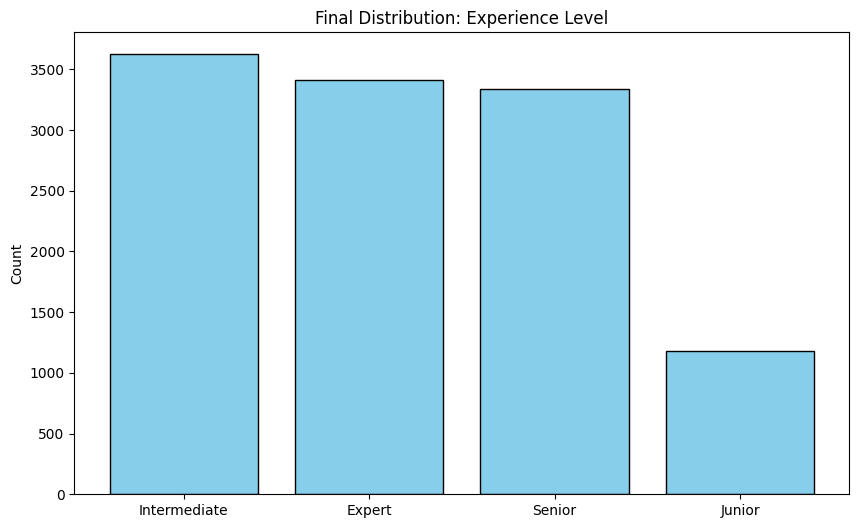

Victory! Lab 11 is officially complete.


In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Load the data from the direct source URL (safest way)
dataset_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m1_survey_data.csv"
df = pd.read_csv(dataset_url)

# 2. Identify the correct column name (WorkExp vs YearsCodePro)
target_col = 'YearsCodePro' if 'YearsCodePro' in df.columns else 'WorkExp'
print(f"Using column: {target_col}")

# 3. Clean and Categorize
df[target_col] = pd.to_numeric(df[target_col].replace({'More than 50 years': 51, 'Less than 1 year': 0}), errors='coerce').fillna(0)

def categorize_experience(years):
    if years < 2: return 'Junior'
    elif 2 <= years < 5: return 'Intermediate'
    elif 5 <= years < 10: return 'Senior'
    else: return 'Expert'

df['ExperienceLevel'] = df[target_col].apply(categorize_experience)

# 4. Final Visualization
exp_counts = df['ExperienceLevel'].value_counts()
plt.figure(figsize=(10,6))
plt.bar(exp_counts.index, exp_counts.values, color='skyblue', edgecolor='black')
plt.title('Final Distribution: Experience Level')
plt.ylabel('Count')
plt.show()

print("Victory! Lab 11 is officially complete.")

In [7]:
print(df.columns.tolist())

['Respondent', 'MainBranch', 'Hobbyist', 'OpenSourcer', 'OpenSource', 'Employment', 'Country', 'Student', 'EdLevel', 'UndergradMajor', 'EduOther', 'OrgSize', 'DevType', 'YearsCode', 'Age1stCode', 'YearsCodePro', 'CareerSat', 'JobSat', 'MgrIdiot', 'MgrMoney', 'MgrWant', 'JobSeek', 'LastHireDate', 'LastInt', 'FizzBuzz', 'JobFactors', 'ResumeUpdate', 'CurrencySymbol', 'CurrencyDesc', 'CompTotal', 'CompFreq', 'ConvertedComp', 'WorkWeekHrs', 'WorkPlan', 'WorkChallenge', 'WorkRemote', 'WorkLoc', 'ImpSyn', 'CodeRev', 'CodeRevHrs', 'UnitTests', 'PurchaseHow', 'PurchaseWhat', 'LanguageWorkedWith', 'LanguageDesireNextYear', 'DatabaseWorkedWith', 'DatabaseDesireNextYear', 'PlatformWorkedWith', 'PlatformDesireNextYear', 'WebFrameWorkedWith', 'WebFrameDesireNextYear', 'MiscTechWorkedWith', 'MiscTechDesireNextYear', 'DevEnviron', 'OpSys', 'Containers', 'BlockchainOrg', 'BlockchainIs', 'BetterLife', 'ITperson', 'OffOn', 'SocialMedia', 'Extraversion', 'ScreenName', 'SOVisit1st', 'SOVisitFreq', 'SOVisi

### Summary


In this lab, you:

- Explored the dataset to identify inconsistencies and missing values.

- Encoded categorical variables for analysis.

- Handled missing values using imputation techniques.

- Normalized and transformed numerical data to prepare it for analysis.

- Engineered a new feature to enhance data interpretation.


Copyright © IBM Corporation. All rights reserved.
